@misc{misc_iris_53,
  author       = {Fisher,R. A.},
  title        = {{Iris}},
  year         = {1988},
  howpublished = {UCI Machine Learning Repository},
  note         = {{DOI}: https://doi.org/10.24432/C56C76}
}

### Inspired by "Python Flask Machine Learning Web App Tutorial" on Youtube by Greg Hogg

In [246]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from joblib import dump, load


In [247]:
data = pd.read_csv("./iris/iris.data.csv")
data

,s_len,s_wid,p_len,p_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: >

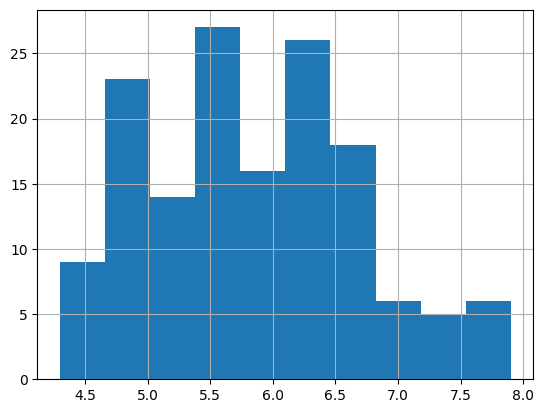

In [248]:
sepal_length = data["s_len"]
sepal_width = data["s_wid"]
petal_length = data["p_len"]
petal_width = data["p_wid"]
sepal_length.hist()


<Axes: >

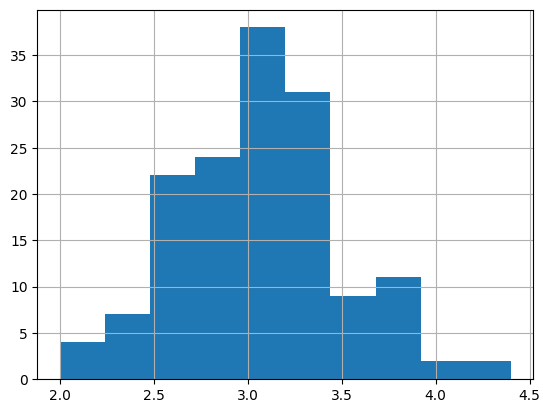

In [249]:
sepal_width.hist()


<Axes: >

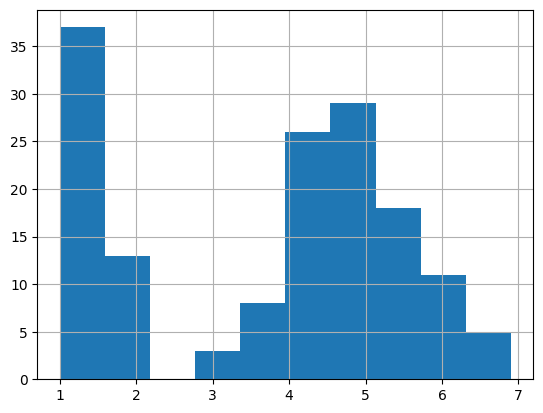

In [250]:
petal_length.hist()


<Axes: >

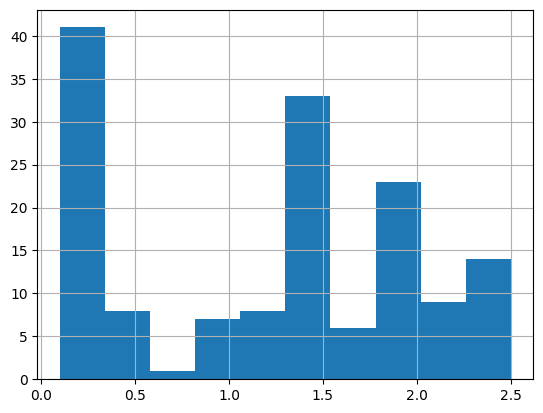

In [251]:
petal_width.hist()

<Axes: xlabel='s_wid', ylabel='s_len'>

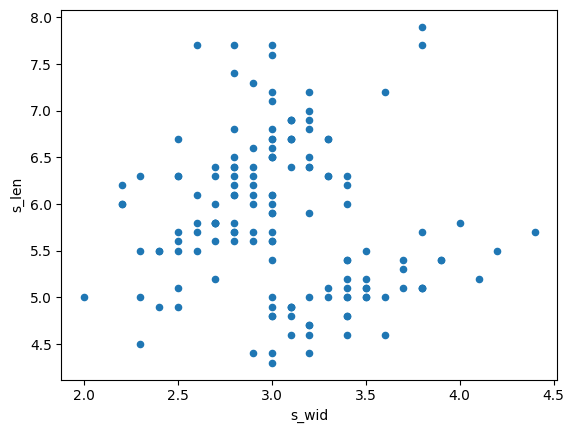

In [252]:
data.plot.scatter(x='s_wid', y='s_len')

<Axes: xlabel='p_wid', ylabel='p_len'>

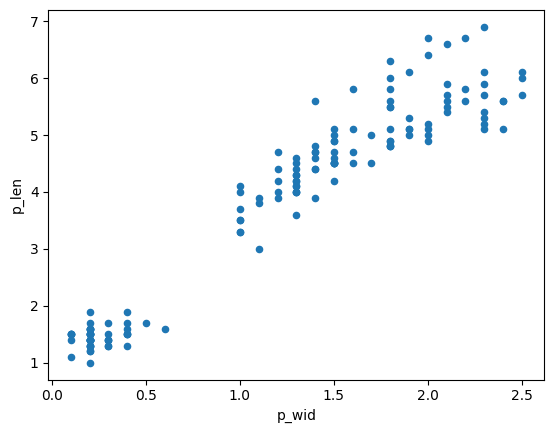

In [253]:
data.plot.scatter(x='p_wid', y='p_len')

In [254]:
fig = px.scatter(x=petal_width,y=petal_length,title="length versus height of petals",labels={'x': 'petal width', 'y': 'petal length'})
fig.show()

In [255]:
p_len_np = petal_length.to_numpy()
p_wid_np = petal_width.to_numpy()

#Need to reshape for scikit linear regression
p_wid_np_reshape = p_wid_np.reshape(len(petal_width),1)
p_wid_np_reshape

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [256]:
model = LinearRegression().fit(p_wid_np_reshape,p_len_np)
model.coef_
#for every increase in 1 on the x-axis, we expect 2.22 on the y-axis

array([2.22588531])

In [257]:
preds = model.predict(p_wid_np_reshape)

In [258]:
fig = px.scatter(x=petal_width,y=petal_length,title="length versus height of petals",labels={'x': 'petal width', 'y': 'petal length'})

fig.add_trace(go.Scatter(x=p_wid_np, y=preds, mode='lines', name='Model'))
fig.write_image('static/baseline.svg', width=800)
fig.show()

In [259]:
dump(model, 'iris.joblib')

['iris.joblib']

In [260]:
model_in = load('iris.joblib')
model_in.predict(np.array([[1]]))

array([3.31645745])

In [261]:
def plot_model(training_data_file_name, model, petal_width_input, model_output_graph):
    data = pd.read_csv("./iris/iris.data.csv")
    petal_length = data["p_len"]
    petal_width = data["p_wid"]
    p_len_np = petal_length.to_numpy()
    p_wid_np = petal_width.to_numpy()
    p_wid_np_reshape = p_wid_np.reshape(len(petal_width),1)
    p_wid_np_reshape        
    preds = model.predict(p_wid_np_reshape)
    fig = px.scatter(x=petal_width,y=petal_length,title="length versus height of petals",labels={'x': 'petal width', 'y': 'petal length'})
    fig.add_trace(go.Scatter(x=p_wid_np, y=preds, mode='lines', name='Model'))
    new_preds = model.predict(petal_width_input)
    fig.add_trace(go.Scatter(x=petal_width_input.reshape(len(petal_width_input)), y=new_preds, name='New Outputs', mode='markers', marker=dict(color='purple', size=20, line=dict(color='purple', width=2))))
    fig.write_image(model_output_graph, width=800)
    fig.show()

    

In [262]:
plot_model('./iris/iris.data.csv', model_in, format_input('0.6,1.1,1.2'), 'model.svg')

In [263]:
def format_input(input_lst):
    def is_float(s):
        try:
            float(s)
            return True
        except:
            return False
    input_list = np.array([float(x) for x in input_lst.split(',') if is_float(x)])
    return input_list.reshape(len(input_list),1)